In [9]:
import tensorflow as tf 

from tensorflow.keras import layers
from tensorflow.keras import activations
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt
from matplotlib import cm

In [10]:
n=2
model = tf.keras.Sequential([
    layers.Dense(units=n),
    layers.Activation(activations.tanh)
])

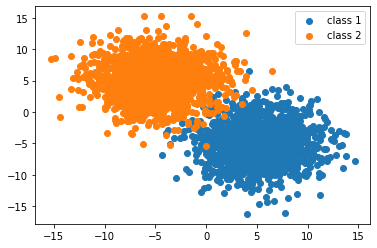

In [55]:
sigma = 3
d= 5
M = 3000
def sample(cl) : return rn.normal([d*cl,-d*cl],[sigma,sigma])
def plot(data):
    c1 = data[0]
    c2 = data[1]
    plt.scatter(c1[:,0],c1[:,1])
    plt.scatter(c2[:,0],c2[:,1])
    plt.legend(['class 1','class 2'])
    
class1 = np.array([sample(1) for el in range(M//2)])
class2 = np.array([sample(-1) for el in range(M//2)])
data = [class1, class2]
plot(data)

In [57]:
x_1 = np.concatenate((class1,np.ones((class1.shape[0],1))),axis=1)
x_2 = np.concatenate((class2,-np.ones((class1.shape[0],1))),axis=1)
_x = np.concatenate((x_1,x_2),axis=0)
train = _x[0:1000,:]
test = _x[1000:,:]
train_x = train[:,0:2]
train_y = train[:,2]
test_x = test[:,0:2]
test_y = test[:,2]

In [60]:
#FOR COMPILING
model.compile(loss='hinge', optimizer='sgd')
# optimizer can be substituted for another one
#FOR EVALUATING
history = model.fit(
    train_x,
    train_y,
    batch_size=64,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(test_x, test_y),
)

Epoch 1/50
16/16 [==============================] - 0s 13ms/step - loss: 0.0565 - val_loss: 0.0804
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0541 - val_loss: 0.0777
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0753
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.0732
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.0713
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.0696
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0462 - val_loss: 0.0681
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0452 - val_loss: 0.0667
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0442 - val_loss: 0.0654
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.0641
Epoch 11/50
16/16 

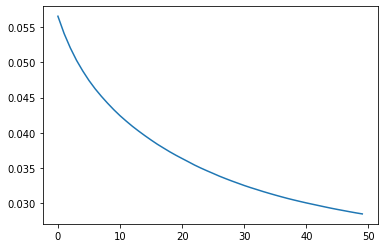

In [63]:
plt.plot(history.history['loss'])

In [65]:
history.history.keys()

dict_keys(['loss', 'val_loss'])